# La Ecuación de Fokker-Plank

La ecuación de Langevin para una partícula browniana que se encuentra bajo la acción de una fuerza externa es: 

$$ \dot{X}(t) = \frac{F(x)}{m\gamma} +b(t)$$

Donde $\gamma$ es una constante que depende de la viscosidad del fluido, $m$ es la masa de la partícula, $F$ es la fuerza exteran $X$ es una variable aleatoria de la posición, $b(t)$ es una fuerza aleatoria. 

Esta ecuación es una ecuación estocastico-diferencial, por lo que resulta particularmente complicado resolverla y numéricamente contiene un ruido intrínseco. Sin embargo, es posible transformar esta ecuación a la ecuación de Fokker-Plank, que es una ecuación diferencial parcial sobre la distribución de probabilidades de $X$. La transformación de un sistema a otro, sin embargo, implica la asumpción que la fuerza externa es lo suficientemente suabe como para quedarnos con los primeros términos de la aproximación en el desarrollo de Tylor. Esto implica que es sólo válida para potenciales suaves, como es el caso de partículas coloidales. La ecuación que obtuvimos en clase es la siguiente: 

$$\frac{\partial}{\partial t} p(x, t) = -[a(x) p(x, t)] + D\frac{\partial^2}{\partial x^2}p(x, t)$$

Esta ecuación (con un poco de talacha) se puede generalizar a 3D y al caso donde $D$ no es una constante. 

$$\frac{\partial p(\mathbf{x},t)}{\partial t} = -\sum_{i=1}^N \frac{\partial}{\partial x_i} \left[ a_i(\mathbf{x}) \, p(\mathbf{x},t) \right] + \frac{1}{2} \sum_{k=1}^M \sum_{i=1}^{N} \frac{\partial}{\partial x_i} \left\{ \sigma_{ik}(\mathbf{x},t)  \sum_{j=1}^{N} \frac{\partial}{\partial x_j} \left[  \sigma_{jk}(\mathbf{x},t) \, p(\mathbf{x},t) \right] \right\}$$

Donde los $\sigma_{ij}$ son los elementos del tensor de difusión: 

$$D_{ij}(\mathbf{x},t) = \frac{1}{2}\sum_{k=1}^M \sigma_{ik}(\mathbf{x},t) \sigma_{jk}(\mathbf{x},t)$$

# Discretización 

Para resolver el problema numéricamente, uno de los métodos más sencillos a aplicarse es el de diferencias finitas. Este consiste en discretizar tanto el tiempo como el espacio la ecuación de difusión y después aplicar el método de Euler sobre la discretización.

Resolveremos el caso 1D. Para esto conviene escribir la ecuación de difusión de forma desarrollada, de tal manera que cada miembro contenga una sola función. Es decir: 


$$\frac{\partial}{\partial t} p(x, t) = -a(x) \frac{\partial}{\partial x}p(x, t)-p(x,t) \frac{\partial}{\partial x}a(x) + D\frac{\partial^2}{\partial x^2}p(x, t)$$

Una vez escrito esto, notamos que: 

$$p^{n+1}_{i} = p(t_{n}+h,x_{i})$$

$$p^{n}_{i+1} = p(t_{n},x_{i} + k)$$

y también que la discretización de las parciales con respecto al tiempo y el espacio se puede escribir como: 

$$\frac{\partial p(t_{n}, x_{i})}{\partial t} = \frac {p(t_{n}+h,x_{i}) - p(t_{n},x_{i})}{h}$$

$$\frac{\partial p(t_{n}, x_{i})}{\partial x} = \frac {p(t_{n},x_{i} + k) - p(t_{n},x_{i})) }{k} $$

La segunda derivada se puede hacer de 3 formas, el más común es el que se conoce como "desarrollo centrado". Es decir: 

$$\frac{\partial^2 p(t_{n}, x_{i})}{\partial x^2} = \frac {p(t_{n},x_{i} + k) - 2p(t_{n},x_{i}) + p(t_{n},x_{i} - k) }{k^2} $$

Que no es otra cosa que aplicar una discretización sobre la primera derivada y después derivar eso. Para esto hay 2 opciones, derivar "hacia delante" o "hacia atrás". La discretización centrada de la segunda parcial respecto a $x$ es primero discretizar hacia delante y después discretizar hacia atrás y hacer un promedio de ambos casos. 

Sustituyendo lo anterior en la ecuación de Fokker-Plank obtenemos: 

$$\frac {p(t_{n}+h,x_{i}) - p(t_{n},x_{i})}{h} =D\frac {p(t_{n},x_{i} + k) - 2p(t_{n},x_{i}) + p(t_{n},x_{i} - k) }{k^2}- a(x_i)  \frac {p(t_{n},x_{i} + k) - p(t_{n},x_{i})) }{k} + p(t_{n},x_{i} ) a'(x_i)$$

De donde podemos despejar $p(t_{n}+h,x_{i})$, para obtener: 

$$p(t_{n}+h,x_{i})  =D\frac {p(t_{n},x_{i} + k) - 2p(t_{n},x_{i}) + p(t_{n},x_{i} - k) }{k^2}- a(x_i)  \frac {p(t_{n},x_{i} + k) - p(t_{n},x_{i})) }{k} + p(t_{n},x_{i} ) a'(x_i)+\frac {p(t_{n},x_{i})}{h}$$

Que es la ecuación con la cual actualizaremos nuestro método de Euler. 


[1] Resuelve la ecuación de Fokker-Plank numéricamente en 1D para el caso donde $a(x) = 0$, usando una delta de dirac como condición inicial de $p$ y condiciones a la frontera absorventes (p = 0). 

[2] Resuelve ahora la ecuación para el caso donde $a(x)$ es algún poso de potencial. 

[3] Resuelve la ecuación para $a(x) = 0$ pero con 2 deltas de dirac como condición inicial. 

[4] Resuelve ahora la ecuación para el caso donde $a$ es un poso de potencial y con 2 deltas de dirac. 

[5] Generaliza el lo de arriba para el caso donde $D$ es una función que depende de la posición. 

[6] Obtén la solución ahora para el caso 2D. 

# Fokker-Planck equation

$$
p_i^{n+1} = p_i^n + \left(D\frac{p_{i+1}^n - 2p_i^n + p_{i-1}^n}{k^2} - a_i\frac{p_{i+1}^n - p_i^n}{k} + p_i^n a'_i\right)h
$$

In [1]:
import Base.println
function println(p::Base.Process, x::Vector{<:Real}, y::Vector{<:Real})
    n = min(length(x), length(y))
    @inbounds for i = 1:n
        println(p, x[i], " ", y[i])
    end
    println(p, "e")
end
function println(p::Base.Process, x::Vector{<:Real}, y::Vector{<:Real}, z::Vector{<:Real})
    n = min(length(x), length(y), length(z))
    @inbounds for i = 1:n
        println(p, x[i], " ", y[i], " ", z[i])
    end
    println(p, "e")
end

println (generic function with 5 methods)

## Initial condition

$$ p(t_0, x_i) = \frac{1}{\pi}\frac{\epsilon}{\epsilon^2 + x_n^2}\approx\delta(x)$$

## Boundary condition

$$ p(t_n, x_0) = p(t_n, x_f) = 0$$

## Diffusion coefficient

$$ D(x) = e^{-3x} $$

In [2]:
function delta(x::Float64,eps::Float64)
    return (eps/pi)/(eps*eps + x*x)
end

function diffusionCoefficient(x::Float64)
    return exp(-3*x)
end

# Potential well and its derivative.
function w(x::Float64, depth::Float64)
    eps::Float64 = 1/depth
    return -delta(x + 0.5, eps)
end

function dwdx(x::Float64, depth::Float64)
    eps::Float64 = 1/depth
    xx = eps*eps + x*x
    return -(eps/pi) * 2*x / xx*xx
end

dwdx (generic function with 1 method)

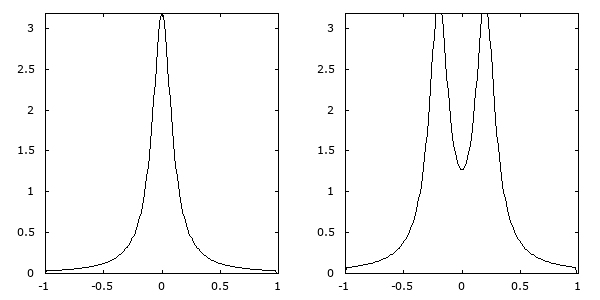

  6.108304 seconds (3.82 M allocations: 183.905 MiB, 1.69% gc time)


In [3]:
function fokkerPlanck1DwithoutWell(x0::Float64, xf::Float64, dx::Float64, dt::Float64)
    nx::Int = fld(xf - x0, dx)
    p1::Vector{Float64} = Vector{Float64}(undef, nx)
    p2::Vector{Float64} = Vector{Float64}(undef, nx)
    x::Vector{Float64} = Vector{Float64}(undef, nx)
    D::Vector{Float64} = Vector{Float64}(undef, nx)
    
    xi::Float64 = x0
    depth::Float64 = 4
    for i = 1:nx
        x[i] = xi
        p1[i] = delta(xi, 0.1)
        p2[i] = delta(xi + 0.2, 0.1) + delta(xi - 0.2, 0.1)
        D[i] = diffusionCoefficient(xi)
        xi += dx
    end
    p1[1] = p2[1] = 0
    p1[nx] = p2[nx] = 0
    
    gp = open(`gnuplot`, "w")
    println(gp, "
        set terminal png enhanced nocrop font 'verdana, 8' size 600, 300;
        set colorsequence podo;
        set xrange [$x0:$xf];
        set yrange [$(minimum(p1)):$(maximum(p1))];
        set nokey;")
    for n = 1:50
        println(gp, "set output 'tmp-", lpad(n, 3, '0'), ".png'")
        
        println(gp, "set multiplot layout 1,2")
        println(gp, "plot '-' w l")
        println(gp, x, p1)
        println(gp, "plot '-' w l")
        println(gp, x, p2)
        println(gp, "unset multiplot")
        
        for tn = 1:300, i = 2:nx-1
            p1[i] += dt * (D[i]*(p1[i+1] - 2*p1[i] + p1[i-1])/dx*dx)
            p2[i] += dt * (D[i]*(p2[i+1] - 2*p2[i] + p2[i-1])/dx*dx)
        end
    end
    close(gp)
    run(`convert -delay 20 tmp-\* -loop 0 output.gif`)
    run(`find -x . -name tmp-\* -delete`)
    display("image/gif", read("output.gif"))
end
@time fokkerPlanck1DwithoutWell(-1.0, 1.0, 0.01, 0.01)

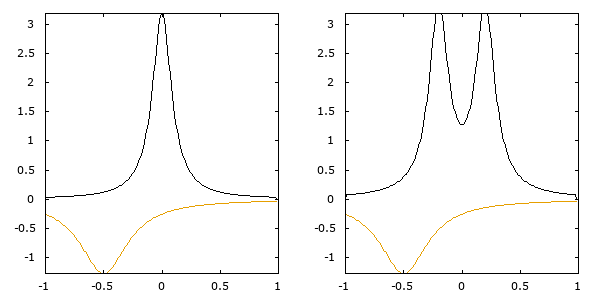

  5.549985 seconds (1.01 M allocations: 32.233 MiB, 0.14% gc time)


In [4]:
function fokkerPlanck1DwithWell(x0::Float64, xf::Float64, dx::Float64, dt::Float64)
    nx::Int = fld(xf - x0, dx)
    p1::Vector{Float64} = Vector{Float64}(undef, nx)
    p2::Vector{Float64} = Vector{Float64}(undef, nx)
    x::Vector{Float64} = Vector{Float64}(undef, nx)
    D::Vector{Float64} = Vector{Float64}(undef, nx)
    a::Vector{Float64} = Vector{Float64}(undef, nx)
    ap::Vector{Float64} = Vector{Float64}(undef, nx)
    
    xi::Float64 = x0
    depth::Float64 = 4
    for i = 1:nx
        x[i] = xi
        p1[i] = delta(xi, 0.1)
        p2[i] = delta(xi + 0.2, 0.1) + delta(xi - 0.2, 0.1)
        D[i] = diffusionCoefficient(xi)
        a[i] = w(xi, depth)
        ap[i] = dwdx(xi, depth)
        xi += dx
    end
    p1[1] = p2[1] = 0
    p1[nx] = p2[nx] = 0
    
    gp = open(`gnuplot`, "w")
    println(gp, "
        set terminal png enhanced nocrop font 'verdana, 8' size 600, 300;
        set colorsequence podo;
        set xrange [$x0:$xf];
        set yrange [$(minimum(a)):$(maximum(p1))];
        set nokey;")
    for n = 1:50
        println(gp, "set output 'tmp-", lpad(n, 3, '0'), ".png'")
        
        println(gp, "set multiplot layout 1,2")
        println(gp, "plot '-' w l, '-' w l")
        println(gp, x, p1)
        println(gp, x, a)
        println(gp, "plot '-' w l, '-' w l")
        println(gp, x, p2)
        println(gp, x, a)
        println(gp, "unset multiplot")
        
        for tn = 1:10, i = 2:nx-1
            p1[i] += dt * (
                D[i]*(p1[i+1] - 2*p1[i] + p1[i-1])/dx*dx -
                a[i] * (p1[i+1] - p1[i]) / dx +
                ap[i] * p1[i])
            p2[i] += dt * (
                D[i]*(p2[i+1] - 2*p2[i] + p2[i-1])/dx*dx -
                a[i] * (p2[i+1] - p2[i]) / dx +
                ap[i] * p2[i])
        end
    end
    close(gp)
    run(`convert -delay 20 tmp-\* -loop 0 output.gif`)
    run(`find -x . -name tmp-\* -delete`)
    display("image/gif", read("output.gif"))
end
@time fokkerPlanck1DwithWell(-1.0, 1.0, 0.01, 0.01)